In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Load the data
# data = pd.read_csv("/home/jakejoseph/Desktop/Joseph_Code/MVI_0288DLC_resnet50_RhodesInRigWithMarksAug18shuffle1_300000.csv", skiprows=3, header=None)
#Data from muscle fatigue test
data = pd.read_csv("/home/jakejoseph/Desktop/FES_V1-Joseph-2023-10-16/videos/MVI_0401DLC_resnet50_FES_V1Oct16shuffle1_38000.csv", skiprows=3, header=None)

In [84]:
#Initialize variables
stimCmds  = [0, 8, 16, 24, 31, 39, 43, 47, 51, 55, 59, 67, 75, 82, 90]
stimTimes = [21, 28, 35, 41, 57, 64, 75, 81, 88, 94, 101 ,109 ,116, 124, 133, 140]
useFramesMove = [670, 889, 1073, 1246, 1725, 1944, 2275, 2470, 2665, 2855, 3072, 3304, 3517, 3745, 4036] #I think these are hand selected frames by matt for when the stim is happening?
label1 = ["Forearm", "Wrist", "Hand", "MCP", "PIP", "DIP"]
label2 = ["x", "y", "likelihood"]
videoHeight = 720
fps = 29.97
threshold = 0.75
window = 30
#flip y pixels
# data.iloc[:,2::3] = videoHeight - data.iloc[:,2::3]  #not used

In [102]:
#moving average
for i in range(1, len(data.columns),3):
    x = data.columns[i]
    y = data.columns[i+1]

    x_ma = data[x].rolling(window=window, min_periods=1).mean()
    y_ma = data[y].rolling(window=window, min_periods=1).mean()

    data[x] = x_ma
    data[y] = y_ma
    
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0,526.659241,406.261230,0.913010,560.164185,452.072662,0.857745,680.277649,464.283813,0.857281,892.101868,272.101196,0.940854,923.448975,77.449730,0.939611
1,1,526.383148,405.968872,0.919322,560.443054,451.423004,0.845178,680.284454,463.921844,0.854380,891.703949,272.147705,0.943259,923.445251,77.658703,0.908831
2,2,526.213603,405.807485,0.934166,560.375997,451.047160,0.869647,680.264547,463.489512,0.882482,891.359456,271.702372,0.954656,923.337179,77.470673,0.922121
3,3,526.027115,405.625389,0.945851,560.386932,450.859375,0.842314,680.223145,463.400024,0.835458,890.954315,271.482491,0.965645,923.751999,77.039722,0.924855
4,4,525.870557,405.496991,0.950284,560.362012,450.793402,0.821277,680.271765,463.428009,0.861589,890.926257,271.291461,0.951316,923.726111,77.084532,0.921467


In [82]:
#low pass filter test

from scipy.signal import butter, filtfilt
import pandas as pd

# Butterworth Low Pass Filter
def butter_lowpass_filter(data, cutoff, fs, order=5):
    nyq = 0.5 * fs  # Nyquist Frequency
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

# Parameters
cutoff = 2  # increase if the smoothing is too aggressive
fs = 30  
order = 4  # try 4-6 and see what happens

# Apply filter to each relevant column
for i in range(0, len(df.columns), 3):
    x_col = df.columns[i]  # X coordinate column
    y_col = df.columns[i + 1]  # Y coordinate column

    df[x_col] = butter_lowpass_filter(df[x_col], cutoff, fs, order)
    df[y_col] = butter_lowpass_filter(df[y_col], cutoff, fs, order)


ValueError: The length of the input vector x must be greater than padlen, which is 15.

In [99]:
def interpolate(df, x, y, likelihood):
    for i in range(1, len(df)):
        if df.iloc[i, likelihood] < threshold:
            df.iloc[i, x] = df.iloc[i-1, x]
            df.iloc[i, y] = df.iloc[i-1, y]

threshold = 0.75
for i in range(1,len(data.columns),3):
    likelihood = i + 2  
    x_col = i  
    y_col = i + 1  
    interpolate(data, x_col, y_col, likelihood)
data.head()



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0,526.659241,406.261230,0.913010,560.164185,452.072662,0.857745,680.277649,464.283813,0.857281,892.101868,272.101196,0.940854,923.448975,77.449730,0.939611
1,1,526.107056,405.676514,0.919322,560.721924,450.773346,0.845178,680.291260,463.559875,0.854380,891.306030,272.194214,0.943259,923.441528,77.867676,0.908831
2,2,525.874512,405.484711,0.934166,560.241882,450.295471,0.869647,680.224731,462.624847,0.882482,890.670471,270.811707,0.954656,923.121033,77.094612,0.922121
3,3,525.467651,405.079102,0.945851,560.419739,450.296021,0.842314,680.098938,463.131561,0.835458,889.738892,270.822845,0.965645,924.996460,75.746872,0.924855
4,4,525.244324,404.983398,0.950284,560.262329,450.529510,0.821277,680.466248,463.539948,0.861589,890.814026,270.527344,0.951316,923.622559,77.263771,0.921467


In [34]:
def calculate_angle(p1,p2, p3):
    #Calculate the angle at p2
    #Calculate the vectors
    v1 = np.array(p1) - np.array(p2)
    v2 = np.array(p3) - np.array(p2)
    #Calculate the angle
    angle = np.arccos(np.dot(v1,v2) / (np.linalg.norm(v1) * np.linalg.norm(v2)))
    #Convert to degrees
    angle = np.degrees(angle)
    return angle

calculate_angle((1,0),(0,0),(0.5,0.5)) #output should be 45 degrees

45.00000000000001

In [85]:
wristAngle = []
mcpAngle = []
pipAngle = []
for i in range(len(data)):  #save angle for each posture for all frames
    forearm = (data.iloc[i][data.columns[1]], data.iloc[i][data.columns[2]])
    wrist = (data.iloc[i][data.columns[4]], data.iloc[i][data.columns[5]])
    mcp = (data.iloc[i][data.columns[10]], data.iloc[i][data.columns[11]])
    pip = (data.iloc[i][data.columns[13]], data.iloc[i][data.columns[14]])
    dip = (data.iloc[i][data.columns[16]], data.iloc[i][data.columns[17]])
    wristAngle.append(calculate_angle(forearm, wrist, mcp))
    mcpAngle.append(calculate_angle(wrist, mcp, pip))
    pipAngle.append(calculate_angle(mcp, pip, dip))

IndexError: index 16 is out of bounds for axis 0 with size 16

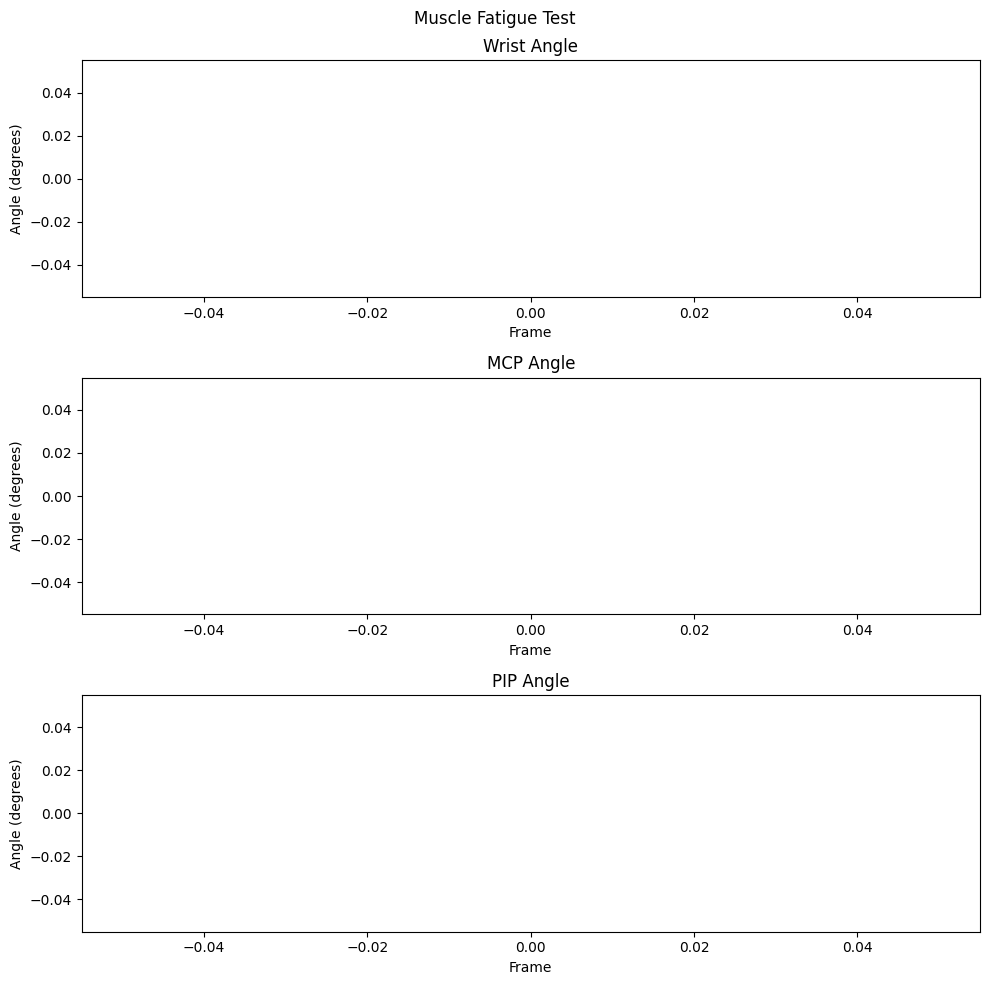

In [86]:
#Plotting Angles over Time
fig, axs = plt.subplots(3,1, figsize=(10,10))

axs[0].plot(wristAngle)
axs[0].set_title("Wrist Angle")
axs[0].set_xlabel("Frame")
axs[0].set_ylabel("Angle (degrees)")

axs[1].plot(mcpAngle)
axs[1].set_title("MCP Angle")
axs[1].set_xlabel("Frame")
axs[1].set_ylabel("Angle (degrees)")

axs[2].plot(pipAngle)
axs[2].set_title("PIP Angle")
axs[2].set_xlabel("Frame")
axs[2].set_ylabel("Angle (degrees)")
fig.suptitle("30 Frame Moving Average + Interpolation")

plt.tight_layout()
plt.show()



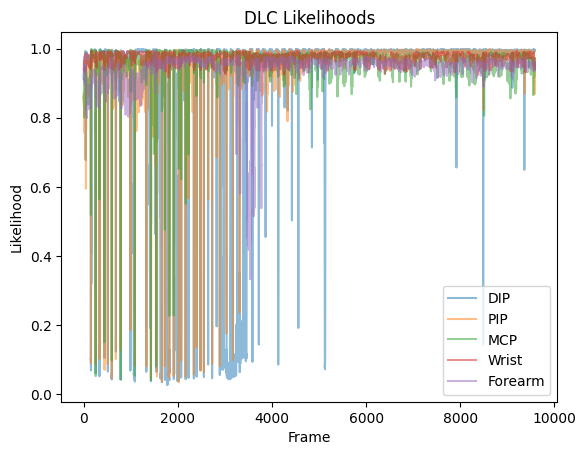

In [156]:
plt.plot(data.iloc[:][data.columns[3]], label = 'DIP', alpha = 0.5)
plt.plot(data.iloc[:][data.columns[6]], label = 'PIP', alpha = 0.5)
plt.plot(data.iloc[:][data.columns[9]], label = 'MCP', alpha = 0.5)
plt.plot(data.iloc[:][data.columns[12]], label = 'Wrist', alpha = 0.5)
plt.plot(data.iloc[:][data.columns[15]], label = 'Forearm', alpha = 0.5)
plt.title("DLC Likelihoods")
plt.ylabel("Likelihood")
plt.xlabel("Frame")
plt.legend()
plt.show()

In [103]:
wristAngle = []
mcpAngle = []
pipAngle = []
for i in range(len(data)):  #save angle for each posture for all frames
    forearm = (data.iloc[i][data.columns[13]], data.iloc[i][data.columns[14]])
    wrist = (data.iloc[i][data.columns[10]], data.iloc[i][data.columns[11]])
    mcp = (data.iloc[i][data.columns[7]], data.iloc[i][data.columns[8]])
    pip = (data.iloc[i][data.columns[4]], data.iloc[i][data.columns[5]])
    dip = (data.iloc[i][data.columns[1]], data.iloc[i][data.columns[2]])
    wristAngle.append(calculate_angle(forearm, wrist, mcp))
    mcpAngle.append(calculate_angle(wrist, mcp, pip))
    pipAngle.append(calculate_angle(mcp, pip, dip))

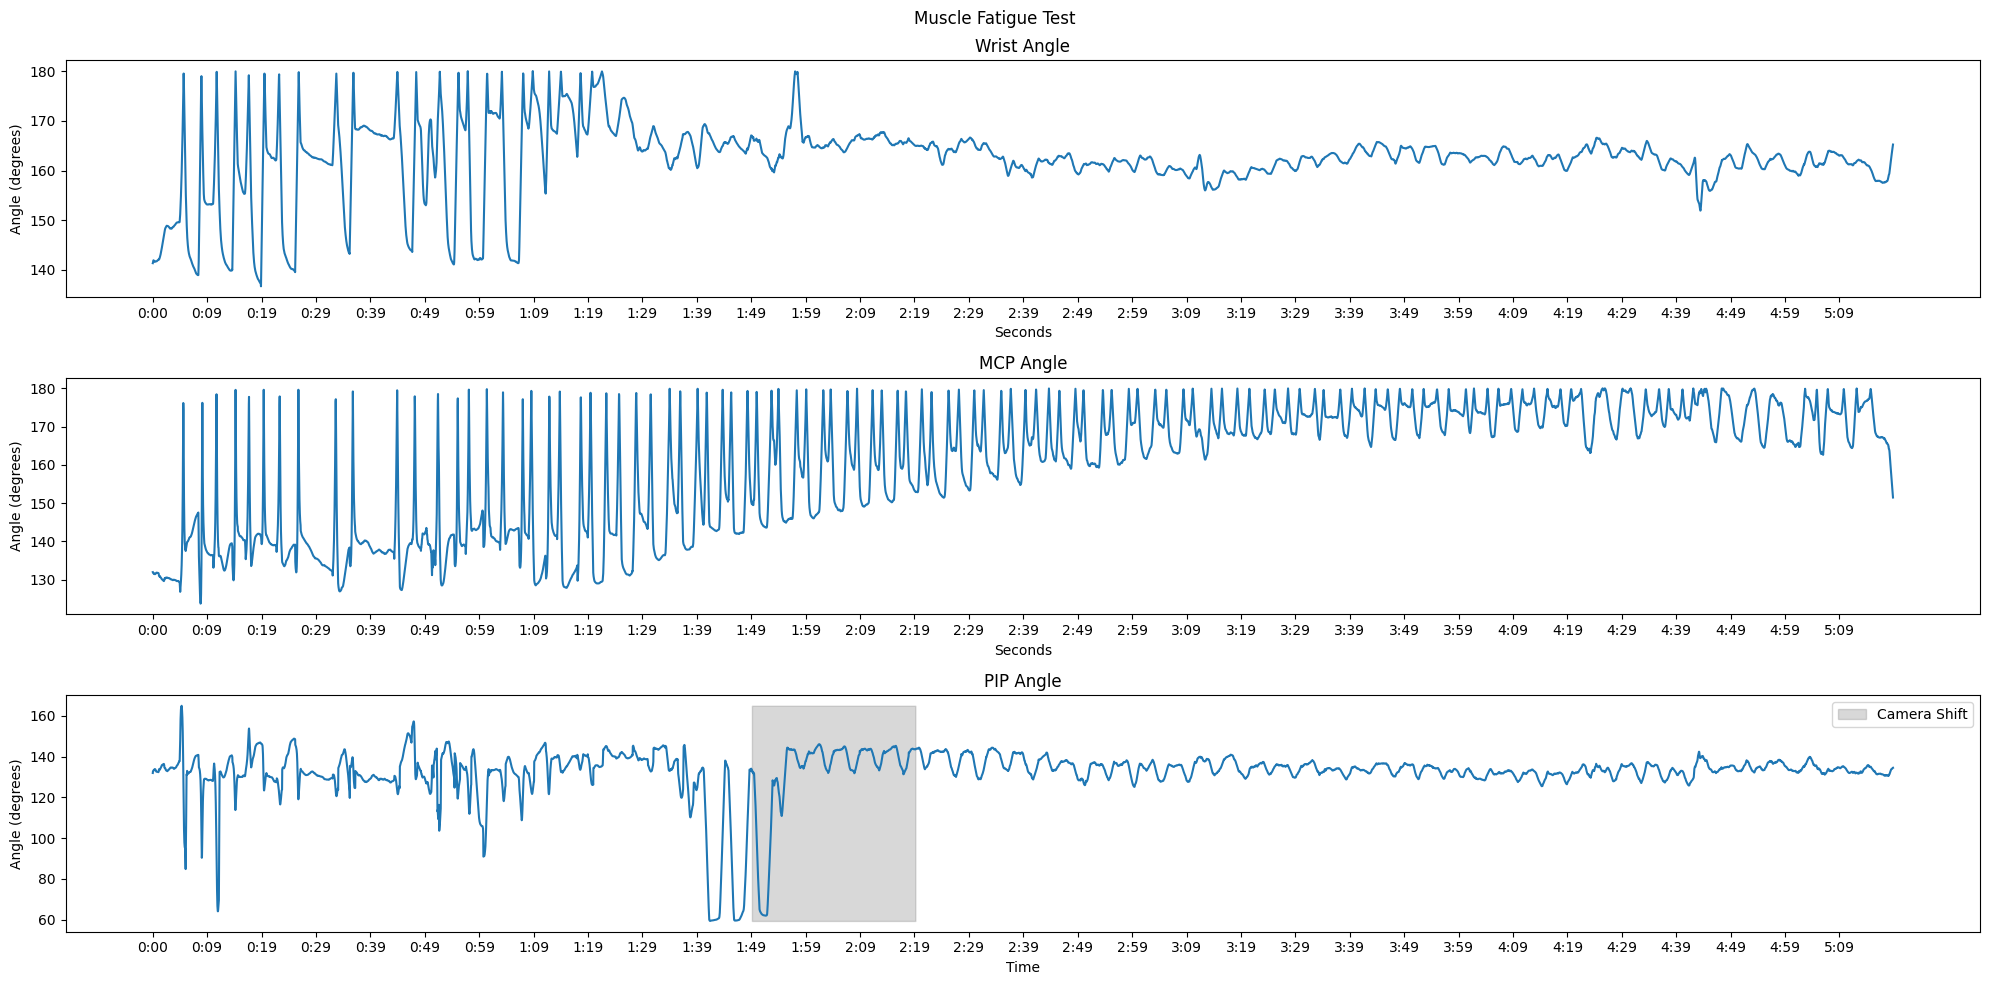

In [140]:
#Plotting Angles over Time

# Time array (in seconds)
time = np.arange(len(wristAngle)) / 30
# Convert time to minutes:seconds format
time_labels = [f'{int(t // 60)}:{int(t % 60):02d}' for t in time]

slice_interval = 10# seconds
slicing_indices = np.arange(0, len(time), slice_interval * fps).astype(int)

fig, axs = plt.subplots(3,1, figsize=(20,10))

axs[0].plot(time,wristAngle)
axs[0].set_title("Wrist Angle")
axs[0].set_xlabel("Seconds")
axs[0].set_ylabel("Angle (degrees)")
axs[0].set_xticks(time[slicing_indices], [time_labels[i] for i in slicing_indices])


axs[1].plot(time,mcpAngle)
axs[1].set_title("MCP Angle")
axs[1].set_xlabel("Seconds")
axs[1].set_ylabel("Angle (degrees)")
axs[1].set_xticks(time[slicing_indices], [time_labels[i] for i in slicing_indices])


axs[2].plot(time,pipAngle)
axs[2].set_title("PIP Angle")
axs[2].set_xlabel("Time")
axs[2].set_ylabel("Angle (degrees)")
axs[2].set_xticks(time[slicing_indices], [time_labels[i] for i in slicing_indices])
axs[2].fill_between(time, min(pipAngle), max(pipAngle), where=(time >= 110) & (time <= 140), color='grey', alpha=0.3, label='Camera Shift')
plt.legend()
fig.suptitle("Muscle Fatigue Test")
plt.tight_layout()

plt.show()

In [59]:
# Taking a 1 second window around each stim command (30 fps)
wristStim = [np.mean(wristAngle[max(i-15, 0):min(i+15, len(wristAngle))]) for i in useFramesMove]
mcpStim = [np.mean(mcpAngle[max(i-15, 0):min(i+15, len(mcpAngle))]) for i in useFramesMove]
pipStim = [np.mean(pipAngle[max(i-15, 0):min(i+15, len(pipAngle))]) for i in useFramesMove]


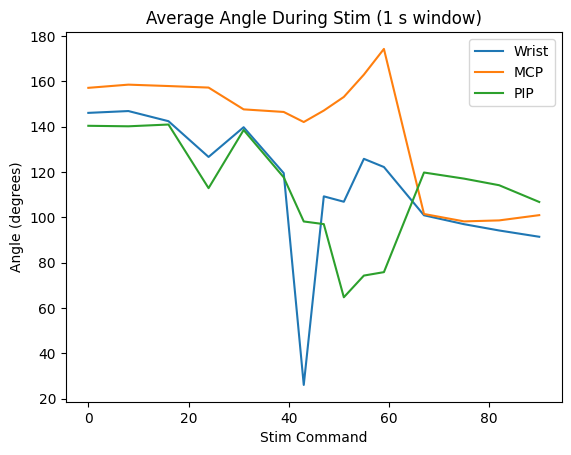

In [61]:
plt.plot(stimCmds, wristStim, label="Wrist")
plt.plot(stimCmds, mcpStim, label="MCP")
plt.plot(stimCmds, pipStim, label="PIP")
plt.legend()
plt.xlabel("Stim Command")
plt.ylabel("Angle (degrees)")
plt.title("Average Angle During Stim (1 s window)")
plt.show()

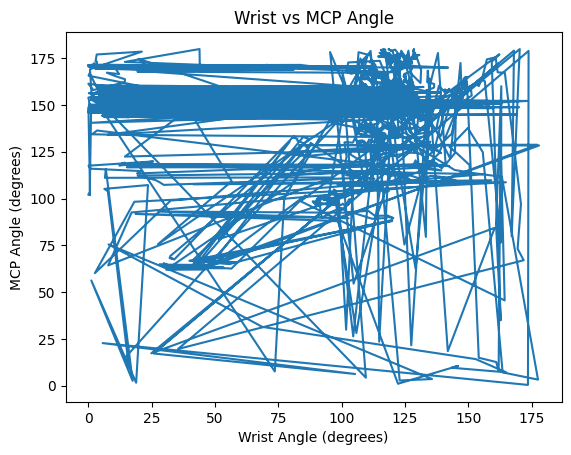

In [67]:
plt.plot(wristAngle,mcpAngle)
plt.title("Wrist vs MCP Angle")
plt.xlabel("Wrist Angle (degrees)")
plt.ylabel("MCP Angle (degrees)")
plt.show()

# To do
- Figure out how to remove noisy movement from data
  - Interpolation or sliding average?
- Make a command curve for each electrode (across pulse width or amp? constant freq)
- Account for low likelihoods from DLC